# Constraint-based modelling with COBRApy
## PART I
#### Tiago Machado & Nadine Topfer

## Part 1 - Loading and initial exploration of a generic model of plant metabolism

### 1.1 - Load the model into a COBRApy object

In [1]:
from cobra.io import read_sbml_model

core_model = read_sbml_model('PlantCoreMetabolism_v2_0_0.xml')

### 1.2 - How many metabolites does the model contain?

In [2]:
print("The model contains {} metabolites.".format(len(core_model.metabolites)))

The model contains 861 metabolites.


### 1.3 - How many reactions does the model contain?

In [3]:
print("The model contains {} reactions.".format(len(core_model.reactions)))

The model contains 892 reactions.


### 1.4 - How many exchange (boundary) reactions does the model contain?

In [4]:
print("The model contains {} exchange reactions.".format(len(core_model.medium)))

The model contains 13 exchange reactions.


### 1.5 - What is the reaction ID of the objective function

In [5]:
import cobra

objective_name = list(cobra.util.linear_reaction_coefficients(core_model).keys())[0].id

print("The ID of the objective funtion reaction is {}.".format(objective_name))

The ID of the objective funtion reaction is Phloem_output_tx.


## Part 2 - Model Simulation

### 2.1 - What is the default solver being used to perform linear optimization?

In [6]:
print("The solver used by default by the model is {}.".format(cobra.util.solver.get_solver_name(core_model)))

The solver used by default by the model is glpk.


### 2.2 - Perform a FBA simulation with the model using the default parameters

In [7]:
FBA_1 = core_model.optimize()

#### 2.2.1 - What is the flux value of the objective function reaction?

In [8]:
print("The objective function flux value is: {} micromol m-2 s-1.".format(FBA_1.objective_value))

The objective function flux value is: 519.2432828257128 micromol m-2 s-1.


#### 2.2.2 What is the reaction ID of the photon uptake reaction? And what is the corresponding flux value?

In [9]:
core_model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
CARBON_DIOXIDE_e,CO2_tx,3.13,1,0.06%
AMMONIUM_e,NH4_tx,56.87,0,0.00%
OXYGEN_MOLECULE_e,O2_tx,1.491,0,0.00%
Photon_e,Photon_tx,1000,0,0.00%
SULFATE_e,SO4_tx,0.4348,0,0.00%
SUCROSE_e,Sucrose_tx,435.8,12,99.94%
Metabolite,Reaction,Flux,C-Number,C-Flux
WATER_e,H2O_tx,-36.78,0,0.00%
PROTON_e,H_tx,-64.21,0,0.00%


In [10]:
core_model.reactions.query("Photon_tx")

[<Reaction Photon_tx at 0x7ff5858dd2a0>]

In [11]:
print("The photon uptake reaction ID is {}. The reaction flux value is {} micromol m-2 s-1.".format(core_model.reactions.query("Photon_tx")[0].id ,FBA_1.fluxes["Photon_tx"] ))

The photon uptake reaction ID is Photon_tx. The reaction flux value is 1000.0 micromol m-2 s-1.


### 2.3 - Obtain a flux solution of an autotrophic growth state using FBA.

In [12]:
core_model.medium

{'Ca_tx': 1000.0,
 'Photon_tx': 1000.0,
 'Sucrose_tx': 1000.0,
 'H2O_tx': 1000.0,
 'CO2_tx': 1000.0,
 'O2_tx': 1000.0,
 'Pi_tx': 1000.0,
 'Mg_tx': 1000.0,
 'Nitrate_tx': 1000.0,
 'SO4_tx': 1000.0,
 'NH4_tx': 1000.0,
 'K_tx': 1000.0,
 'GLC_tx': 1000.0}

In [13]:
from cobra import flux_analysis

with core_model:
    medium = core_model.medium
    medium["GLC_tx"] = 0.0
    medium["Sucrose_tx"] = 0.0
    core_model.medium = medium
    print(core_model.summary())

Objective
1.0 Phloem_output_tx = 11.568586740088755

Uptake
------
      Metabolite  Reaction     Flux  C-Number  C-Flux
CARBON_DIOXIDE_e    CO2_tx    116.6         1 100.00%
         WATER_e    H2O_tx      106         0   0.00%
      AMMONIUM_e    NH4_tx    1.267         0   0.00%
        Photon_e Photon_tx     1000         0   0.00%
       SULFATE_e    SO4_tx 0.009687         0   0.00%

Secretion
---------
       Metabolite Reaction   Flux  C-Number C-Flux
         PROTON_e     H_tx -1.431         0  0.00%
OXYGEN_MOLECULE_e    O2_tx -116.5         0  0.00%



### 2.4 - Perform a FBA simulation and obtain a flux solution using the parameters described below:

* Autotrophic growth conditions;
* Maximum CO2 uptake must be 20 micromol m-2 s-1;
* Uptake of NH4+ must be blocked;
* Maximum NO3- uptake must be 3 micromol m-2 s-1.

In [14]:
with core_model:
    medium = core_model.medium
    medium["GLC_tx"] = 0.0
    medium["Sucrose_tx"] = 0.0
    medium["CO2_tx"] = 15
    medium["Nitrate_tx"] = 1
    medium["NH4_tx"] = 0
    core_model.medium = medium
    print(core_model.summary())

Objective
1.0 Phloem_output_tx = 1.4884360939624028

Uptake
------
      Metabolite      Reaction     Flux  C-Number  C-Flux
CARBON_DIOXIDE_e        CO2_tx       15         1 100.00%
         WATER_e        H2O_tx     13.8         0   0.00%
       NITRATE_e    Nitrate_tx    0.163         0   0.00%
        Photon_e     Photon_tx    132.6         0   0.00%
       SULFATE_e        SO4_tx 0.001246         0   0.00%
        PROTON_c unlProtHYPO_c    0.142         0   0.00%

Secretion
---------
       Metabolite Reaction   Flux  C-Number C-Flux
OXYGEN_MOLECULE_e    O2_tx -15.31         0  0.00%



#### 2.4.1 - What is the flux value of the objective function reaction?

In [15]:
with core_model:
    medium = core_model.medium
    medium["GLC_tx"] = 0.0
    medium["Sucrose_tx"] = 0.0
    medium["CO2_tx"] = 15
    medium["Nitrate_tx"] = 1
    medium["NH4_tx"] = 0
    core_model.medium = medium
    solution =core_model.optimize()
    print("The objective function flux value is: {} micromol m-2 s-1".format(solution.fluxes["Phloem_output_tx"]))

The objective function flux value is: 1.4884360939624042 micromol m-2 s-1


#### 2.4.2 - Change the objective function to the “AraCore_Biomass_tx” reaction. Perform the FBA simulation like described in 3.2. What is the flux value of the new objective function reaction?

In [ ]:
Photon_uptake = [0, 100, 200, 300, 400, 500]

Biomass = []

for flux_bound in Photon_uptake:
    with core_model:
        core_model.objective = 'AraCore_Biomass_tx'
        medium = core_model.medium
        medium["GLC_tx"] = 0.0
        medium["Sucrose_tx"] = 0.0
        medium["CO2_tx"] = 15
        medium["Nitrate_tx"] = 1
        medium["NH4_tx"] = 0
        core_model.medium = medium
        core_model.reactions.Photon_tx.bounds = (flux_bound, flux_bound) #Change upper and lower bound
        solution = core_model.optimize()
        Biomass.append(solution.fluxes["AraCore_Biomass_tx"])

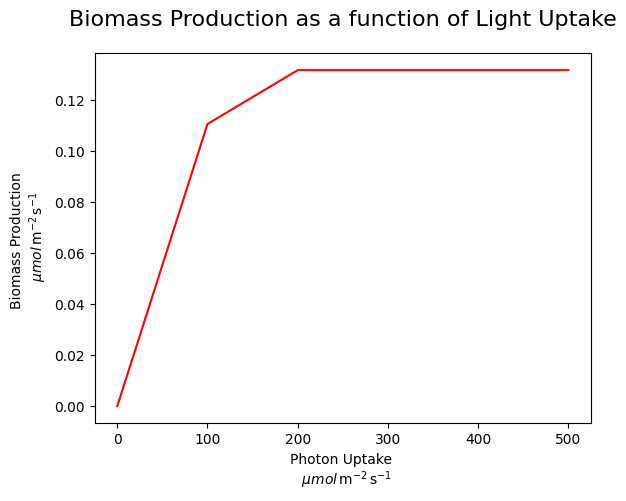

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x = Photon_uptake, y = Biomass, color = 'red')
ax.set(xlabel= 'Photon Uptake \n  $\u03BC mol\, \mathregular{m^{-2} \, s^{-1}}$', 
ylabel= "Biomass Production \n $\u03BC mol\, \mathregular{m^{-2} \, s^{-1}}$")
ax.set_title('Biomass Production as a function of Light Uptake', fontsize=16, pad = 20, ha='center' )
plt.show()

## Bonus Questions

### 1 - Do the constraints described in 2.4 make sense from a biological point of view? Please justify your answer.

The metabolic process for ammonia assimilation is less metabolically expensive than the one for nitrate assimilation. Therefore, the FBA simulation will always choose to uptake nitrogen in the form of ammonium, despite plants assimilating most of the nitrogen in the form of nitrate, hence ammonium assimilation being blocked for this exercise. In nature, the medium in which plants grow (i.e the soil) does not contain unlimited nutrients. Therefore growth conditions in which there exists resource limitation, such as implemented in the exercise for carbon and nitrogen allow us to achieve more biologically realistic flux solutions. The implemented constraints therefore make sense from a biological prespective.

### 2 - What database are the model reaction IDs based on?

The model reaction IDs are based on Metacyc.